<a href="https://colab.research.google.com/github/J-o-y-y/data_visualization_2023_sep./blob/main/20230918_%EC%82%BC%EC%A0%842023Aug_%ED%81%AC%EB%A1%A4%EB%A7%81%EC%97%B0%EC%8A%B53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[주가데이터 크롤링 데이터수집,시각화 프로젝트]

1. 8월 한달간
삼성전자
주가
크롤링하여
stock.csv
파일로저장
(https://finance.naver.com/item/sise.nhn?code=005930)

2. 날짜, 종가만 크롤링

3. 그래프로 시각화


In [9]:
import requests
import re
from bs4 import BeautifulSoup
import csv
import matplotlib.pyplot as plt
from datetime import datetime

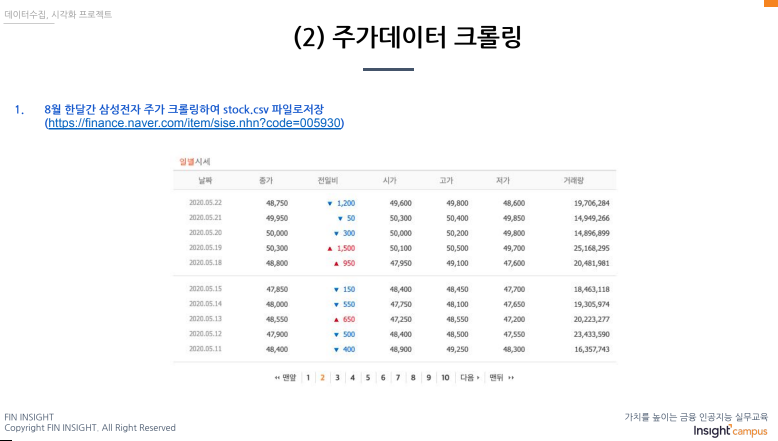

In [4]:
file = open("005930.csv", mode="w", encoding="utf-8", newline="")
writer = csv.writer(file)

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36'
}

writer.writerow(['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량'])

for page in range(2, 5):
    params = {
        'code': '005930',
        'page': page
    }
    res = requests.get('https://finance.naver.com/item/sise_day.naver', headers=headers, params=params)
    sams = BeautifulSoup(res.text, 'html.parser')

    for tr in sams.select('table.type2 > tr'):
        temp = []

        if tr.attrs != {}:
            date = tr.select('td')[0].text.strip()

            if re.match('2023.08', date):
                temp.append(date)
                temp.append(tr.select('td')[1].text)

                print(temp)
                writer.writerow(temp)

file.close()

['2023.08.31', '66,900']
['2023.08.30', '67,100']
['2023.08.29', '66,800']
['2023.08.28', '66,800']
['2023.08.25', '67,100']
['2023.08.24', '68,200']
['2023.08.23', '67,100']
['2023.08.22', '66,600']
['2023.08.21', '66,600']
['2023.08.18', '66,300']
['2023.08.17', '66,700']
['2023.08.16', '67,000']
['2023.08.14', '67,300']
['2023.08.11', '67,500']
['2023.08.10', '68,000']
['2023.08.09', '68,900']
['2023.08.08', '67,600']
['2023.08.07', '68,500']
['2023.08.04', '68,300']
['2023.08.03', '68,800']
['2023.08.02', '69,900']
['2023.08.01', '71,100']


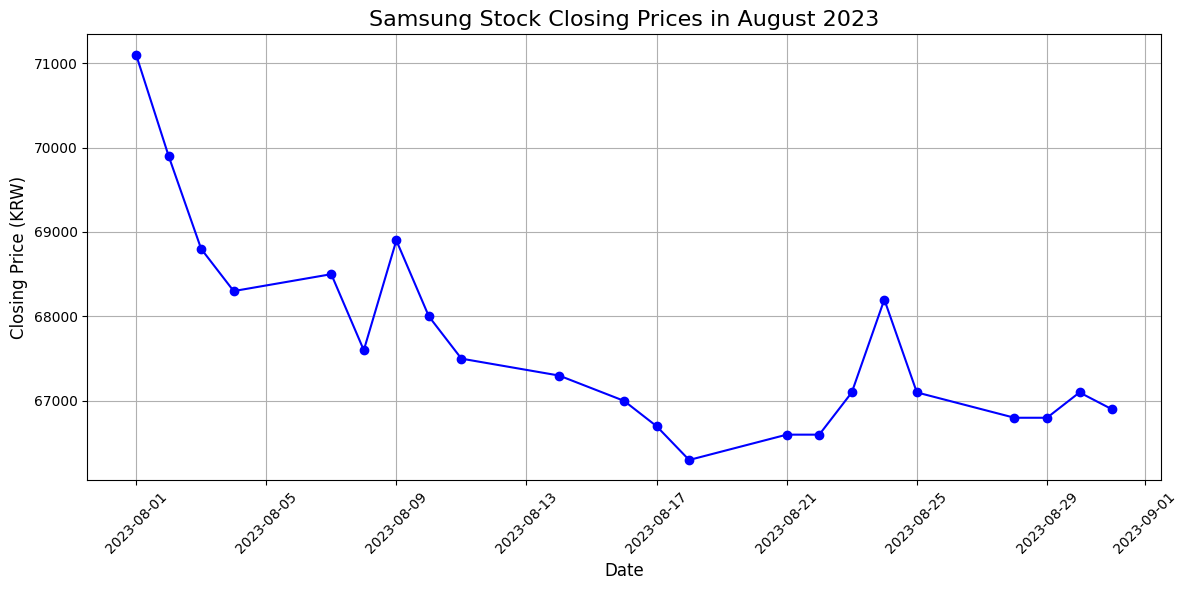

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(dates, closing_prices, marker='o', linestyle='-', color='b')
plt.title('Samsung Stock Closing Prices in August 2023', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (KRW)', fontsize=12)
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
